<a href="https://colab.research.google.com/github/NickKornienko/CMPE-255-Assignment-3/blob/main/KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview:
          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5 

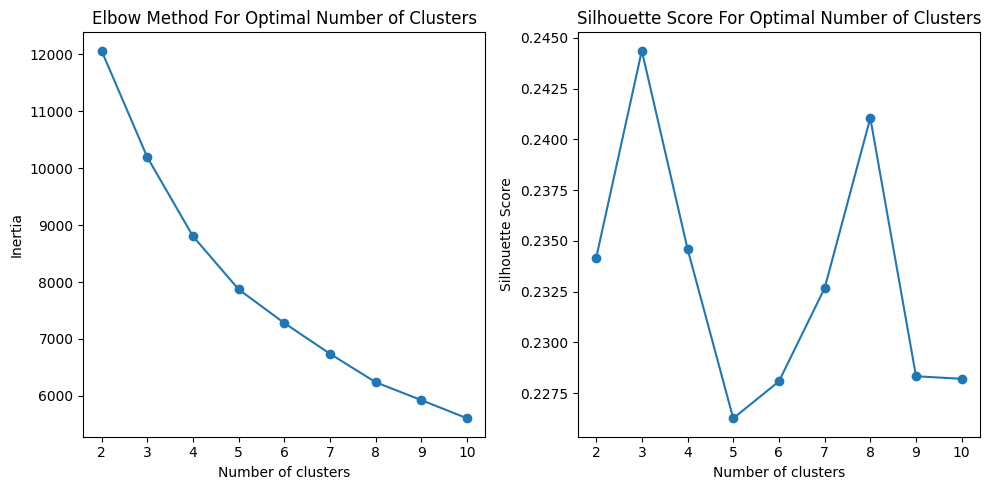

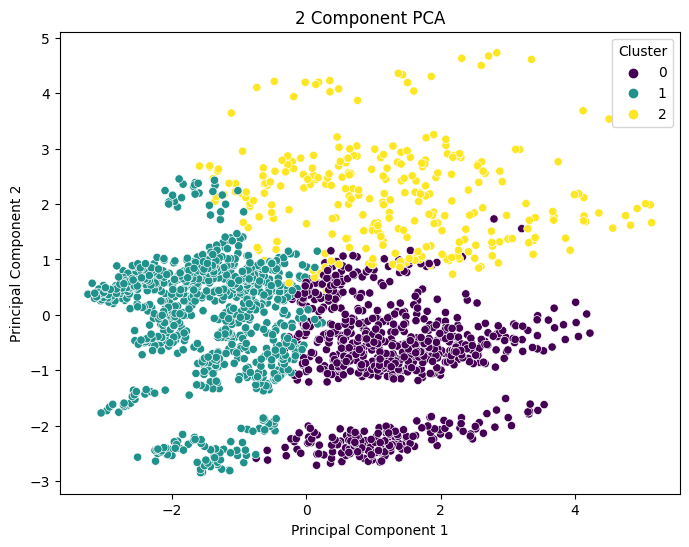

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings

warnings.filterwarnings('ignore')

# Load the dataset
file_path = '/content/segmentation data.csv'  # adjust the file path if needed
df = pd.read_csv(file_path)

# Explore the dataset
print("Dataset Overview:")
print(df.head())
print(df.info())

# Preprocessing: Handle missing values, encode categorical variables, etc.
# This will depend on the actual dataset.

# Transformation: Normalize the dataset as k-Means is sensitive to feature scale
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))  # assuming the df has only numerical columns, adapt if not

# Data Mining: Apply k-Means clustering
inertia = []
silhouette = []
range_n_clusters = range(2, 11)  # adjust the range based on your dataset characteristics
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)  # explicitly set n_init to avoid the warning
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.predict(df_scaled)

    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette.append(silhouette_avg)
    print(f"For n_clusters={n_clusters}, Silhouette score={silhouette_avg}")

# Evaluate the appropriate number of clusters using the Elbow method and Silhouette score
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')

plt.subplot(1,2,2)
plt.plot(range_n_clusters, silhouette, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal Number of Clusters')
plt.tight_layout()
plt.show()

# Based on the elbow method and silhouette score, choose the optimal number of clusters and interpret the results
optimal_clusters = 3  # replace with the optimal number you observe
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.predict(df_scaled)

# Visualize the clusters using PCA if the dimensionality is high
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])
principalDf['Cluster'] = kmeans.predict(df_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=principalDf, palette='viridis')
plt.title('2 Component PCA')
plt.show()
